In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from src.utils.parser import get_args
from src.plot import plot_data
args = get_args()
print(args.radar_wrangled_data_folder)

/home/jack/ssd/01_ty_research/01_radar_data/02_wrangled_files


In [2]:
file_path={}
for i in sorted(os.listdir(args.radar_wrangled_data_folder)):
    file_path[i] = sorted(os.listdir(os.path.join(args.radar_wrangled_data_folder,i)))

In [3]:
data = pd.read_pickle(os.path.join(args.radar_wrangled_data_folder, 'RAD', file_path['RAD'][0]), compression=args.compression).to_numpy().astype(np.float32)
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

/home/jack/ssd/01_ty_research/10_github/RCNN-TY-R-Forecast/data_wrangler/src/plot.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='cyl', resolution='h', llcrnrlat=args.O_y[0], urcrnrlat=args.O_y[1], llcrnrlon=args.O_x[0], urcrnrlon=args.O_x[1])
/home/jack/ssd/01_ty_research/10_github/RCNN-TY-R-Forecast/data_wrangler/src/plot.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='cyl', resolution='h', llcrnrlat=args.O_y[0], urcrnrlat=args.O_y[1], llcrnrlon=args.O_x[0], urcrnrlon=args.O_x[1])
/home/jack/ssd/01_ty_research/10_github/RCNN-TY-R-Forecast/data_wrangler/src/plot.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  _ = m.readshapefile(args.

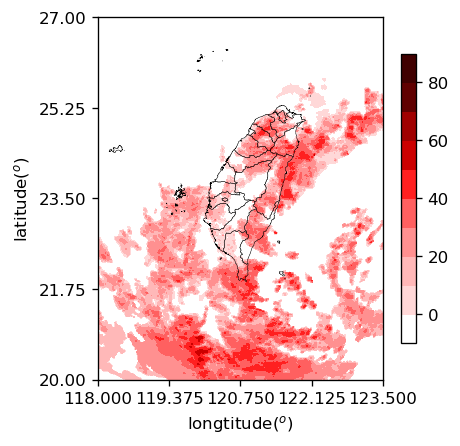

In [4]:
plot_data(args, data)

In [5]:
import torch
import torch.nn.functional as F
data = torch.from_numpy(data).expand(1,1,-1,-1)
data

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])

/home/jack/ssd/01_ty_research/10_github/RCNN-TY-R-Forecast/data_wrangler/src/plot.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='cyl', resolution='h', llcrnrlat=args.O_y[0], urcrnrlat=args.O_y[1], llcrnrlon=args.O_x[0], urcrnrlon=args.O_x[1])
/home/jack/ssd/01_ty_research/10_github/RCNN-TY-R-Forecast/data_wrangler/src/plot.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='cyl', resolution='h', llcrnrlat=args.O_y[0], urcrnrlat=args.O_y[1], llcrnrlon=args.O_x[0], urcrnrlon=args.O_x[1])
/home/jack/ssd/01_ty_research/10_github/RCNN-TY-R-Forecast/data_wrangler/src/plot.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  _ = m.readshapefile(args.

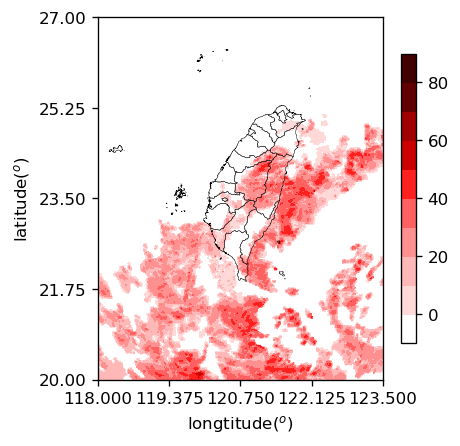

In [8]:
size = torch.Size(data.shape)
theta = torch.tensor([[1.,0.,0],
                      [0.,1.,0.2]]).expand(1,-1,-1)
grid = F.affine_grid(theta, size)
sample = F.grid_sample(data, grid)[0,0]
plot_data(args,sample.numpy())

/home/jack/ssd/01_ty_research/10_github/RCNN-TY-R-Forecast/data_wrangler/src/plot.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='cyl', resolution='h', llcrnrlat=args.O_y[0], urcrnrlat=args.O_y[1], llcrnrlon=args.O_x[0], urcrnrlon=args.O_x[1])
/home/jack/ssd/01_ty_research/10_github/RCNN-TY-R-Forecast/data_wrangler/src/plot.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='cyl', resolution='h', llcrnrlat=args.O_y[0], urcrnrlat=args.O_y[1], llcrnrlon=args.O_x[0], urcrnrlon=args.O_x[1])
/home/jack/ssd/01_ty_research/10_github/RCNN-TY-R-Forecast/data_wrangler/src/plot.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  _ = m.readshapefile(args.

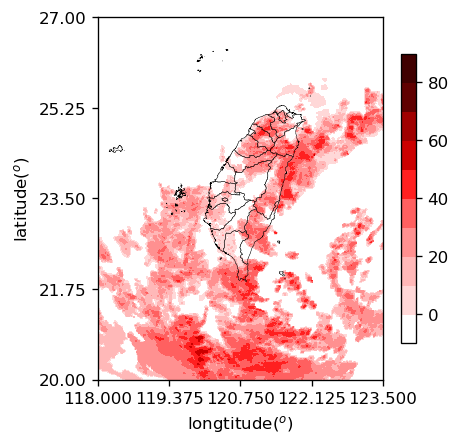

In [13]:
size = torch.Size(data.shape)
theta = torch.tensor([[1.,0.,0],
                      [0.,1.,0]]).expand(1,-1,-1)
grid = F.affine_grid(theta, size)
sample = F.grid_sample(data, grid)[0,0]
plot_data(args,sample.numpy())